In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.functional as F
import torch.nn.functional as F
import plotly.express as px
import pandas as pd
import pymorphy2
from torch import nn
from unicodedata import normalize
from matplotlib import pyplot as plt
import plotly.graph_objects as go

# df = pd.read_csv('C:\\Users\\offic\\Desktop\\DeepLearning\\hw2\\archive\\lenta-ru-news.csv')
# filtered_df = df[df[['topic', 'tags']].notnull().all(1)]

# print(filtered_df.shape)

c:\users\offic\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(712659, 6)


In [3]:
# sample_df = filtered_df.loc[filtered_df['tags']!= 'Все'].sample(n = 100)
sample_df = pd.read_excel("Sample_df.xls")

In [4]:
import regex as re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()

def remove_punctuation(text):
    return re.sub(r"\p{P}+", "", text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
corpus = list(sample_df['title'].apply(lambda x: "".join(filter(lambda x: not x.isdigit(), remove_punctuation(normalize('NFKD', x))))))

In [7]:
corpus

['Направлено в суд дело о невозвращении вывезенных из России старинных икон',
 'Во Франции скамейки огородили решеткой для борьбы с бездомными',
 'Объяснено исчезновение твита о российском происхождении Новичка',
 'Экспорт российского газа во Францию в  году вырос на треть ',
 'Мэттью Перри отказался воссоединиться с Друзьями',
 'Председатель ОБСЕ призвал соблюдать перемирие на Украине',
 'Путин и Порошенко обсудили соглашение об ассоциации Украины с ЕС',
 'Вышел трейлер сериала Мгла по повести Стивена Кинга',
 'В Москве пройдет крупнейшая в мире конференция по квантовым технологиям',
 'Антенны для смартфонов уменьшили в сто раз',
 'На первую встречу Путина и Трампа отвели около часа',
 'Даша Букина из Счастливы вместе рассказала о побежденном бесплодии',
 'Боевики захватили ливийский парламент во время выборов премьера',
 'На отказавшуюся ехать в Крым Лолиту подали в суд',
 'WSJ узнал о связи парижских террористов с британским исламистским подпольем',
 'Суд закрыл торговый ц

In [8]:
def tokenize_corpus(corpus):
    normal = [list(map(lambda normal: morph.parse(normal)[0].normal_form, x.split())) for x in corpus]
#     print(normal)
    tokens = [[token for token in x if token not in stopwords.words("russian")] for x in normal]
#     print(tokens)
    return tokens

tokenized_corpus = tokenize_corpus(corpus)

tokenized_corpus

[['направить',
  'суд',
  'дело',
  'невозвращение',
  'вывезти',
  'россия',
  'старинный',
  'икона'],
 ['франция', 'скамейка', 'огородить', 'решеткой', 'борьба', 'бездомный'],
 ['объяснить',
  'исчезновение',
  'твит',
  'российский',
  'происхождение',
  'новичок'],
 ['экспорт', 'российский', 'газ', 'франция', 'год', 'вырасти', 'треть'],
 ['мэттью', 'перри', 'отказаться', 'воссоединиться', 'друг'],
 ['председатель', 'обсе', 'призвать', 'соблюдать', 'перемирие', 'украина'],
 ['путин',
  'порошенко',
  'обсудить',
  'соглашение',
  'ассоциация',
  'украина',
  'ес'],
 ['выйти', 'трейлера', 'сериал', 'мгла', 'повесть', 'стивен', 'кинг'],
 ['москва',
  'пройдеть',
  'крупнейнуть',
  'мир',
  'конференция',
  'квантовый',
  'технология'],
 ['антенна', 'смартфон', 'уменьшить', 'сто'],
 ['первый', 'встреча', 'путин', 'трамп', 'отвести', 'около', 'час'],
 ['даша',
  'букин',
  'счастливый',
  'вместе',
  'рассказать',
  'победить',
  'бесплодие'],
 ['боевик',
  'захватить',
  'ливии

In [9]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [10]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    print(sentence)
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        print("center_word_pos: " + str(center_word_pos))
        print(range(len(indices)))
        # for each window position
        for w in range(-window_size, window_size + 1):
            print("w: " + str(w))
            context_word_pos = center_word_pos + w
            print(context_word_pos)
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array
idx_pairs

['направить', 'суд', 'дело', 'невозвращение', 'вывезти', 'россия', 'старинный', 'икона']
center_word_pos: 0
range(0, 8)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 8)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 8)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 8)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 8)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 8)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 8)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
center_word_pos: 7
range(0, 8)
w: -2
5
w: -1
6
w: 0
7
w: 1
8
w: 2
9
['франция', 'скамейка', 'огородить', 'решеткой', 'борьба', 'бездомный']
center_word_pos: 0
range(0, 6)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 6)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 6)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 6)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos

center_word_pos: 3
range(0, 8)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 8)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 8)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 8)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
center_word_pos: 7
range(0, 8)
w: -2
5
w: -1
6
w: 0
7
w: 1
8
w: 2
9
['эрдоган', 'обвинить', 'курд', 'взрыв', 'кайсерь']
center_word_pos: 0
range(0, 5)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 5)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 5)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 5)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 5)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
['авак', 'пообещать', 'создать', 'украина', 'аналог', 'swat']
center_word_pos: 0
range(0, 6)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 6)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 6)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w:

w: 2
3
center_word_pos: 2
range(0, 7)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 7)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 7)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 7)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 7)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
['авиация', 'ирак', 'уничтожить', 'колонна', 'автоцистерна', 'иго']
center_word_pos: 0
range(0, 6)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 6)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 6)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 6)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 6)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 6)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
['источник', 'опровергнуть', 'просьба', 'фсин', 'отправить', 'навальный', 'колония']
center_word_pos: 0
range(0, 7)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1


2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 7)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 7)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
['саакашвили', 'пригрозить', 'порошенко', 'пустить', 'новый', 'прокурор', 'одесский', 'область']
center_word_pos: 0
range(0, 8)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 8)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 8)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 8)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 8)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 8)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 8)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
center_word_pos: 7
range(0, 8)
w: -2
5
w: -1
6
w: 0
7
w: 1
8
w: 2
9
['умереть', 'режиссёр', 'владимир', 'агеев']
center_word_pos: 0
range(0, 4)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 4)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
cente

w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
['кандидат', 'президент', 'франция', 'получить', 'пощёчина', 'время', 'визит', 'бретань']
center_word_pos: 0
range(0, 8)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 8)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 8)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 8)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 8)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 8)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 8)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
center_word_pos: 7
range(0, 8)
w: -2
5
w: -1
6
w: 0
7
w: 1
8
w: 2
9
['сбу', 'рассказать', 'сафари', 'пореченков', 'расстрел', 'мирный', 'жителей']
center_word_pos: 0
range(0, 7)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 7)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 7)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 7)
w: -2
1


1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 7)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 7)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 7)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
center_word_pos: 6
range(0, 7)
w: -2
4
w: -1
5
w: 0
6
w: 1
7
w: 2
8
['турчин', 'предложить', 'отправить', 'мыло', 'российский', 'спецслужба']
center_word_pos: 0
range(0, 6)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 6)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_word_pos: 2
range(0, 6)
w: -2
0
w: -1
1
w: 0
2
w: 1
3
w: 2
4
center_word_pos: 3
range(0, 6)
w: -2
1
w: -1
2
w: 0
3
w: 1
4
w: 2
5
center_word_pos: 4
range(0, 6)
w: -2
2
w: -1
3
w: 0
4
w: 1
5
w: 2
6
center_word_pos: 5
range(0, 6)
w: -2
3
w: -1
4
w: 0
5
w: 1
6
w: 2
7
['всё', 'полицейский', 'американский', 'город', 'уволиться', 'вечер']
center_word_pos: 0
range(0, 6)
w: -2
-2
w: -1
-1
w: 0
0
w: 1
1
w: 2
2
center_word_pos: 1
range(0, 6)
w: -2
-1
w: -1
0
w: 0
1
w: 1
2
w: 2
3
center_wo

array([[  0,   1],
       [  0,   2],
       [  1,   0],
       ...,
       [527, 528],
       [528, 526],
       [528, 527]])

In [11]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [12]:
D_in, H, D_out = vocabulary_size, 5, vocabulary_size
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.f_lin = nn.Linear(D_in, H)
        self.s_lin = nn.Linear(H, D_out)
        
    def forward(self, X):
        X = self.f_lin(X)
        return F.log_softmax(self.s_lin(X), dim=0)
    
model = MyModule()
loss_fn = nn.NLLLoss()
optim = torch.optim.Adam(model.parameters(), 0.001)

Loss at epo 0: 6.544979212634853
Loss at epo 1: 6.306498589800365
Loss at epo 2: 6.23435101681935
Loss at epo 3: 6.156913582704215
Loss at epo 4: 6.069614453864759
Loss at epo 5: 5.970075597132701
Loss at epo 6: 5.860185852691309
Loss at epo 7: 5.744214388099052
Loss at epo 8: 5.624362905015315
Loss at epo 9: 5.50228381195048
Loss at epo 10: 5.381393874886194
Loss at epo 11: 5.264299049179183
Loss at epo 12: 5.15155894009035
Loss at epo 13: 5.043274164835273
Loss at epo 14: 4.939476980964766
Loss at epo 15: 4.840163985167994
Loss at epo 16: 4.745370325630407
Loss at epo 17: 4.65499639231513
Loss at epo 18: 4.568924942250445
Loss at epo 19: 4.4870093213215565
Loss at epo 20: 4.409097250082345
Loss at epo 21: 4.335008458415074
Loss at epo 22: 4.264560471084327
Loss at epo 23: 4.197578269472
Loss at epo 24: 4.133876051412209
Loss at epo 25: 4.073253973079389
Loss at epo 26: 4.015540339672235
Loss at epo 27: 3.9605712370831827
Loss at epo 28: 3.90821934788466
Loss at epo 29: 3.858331126063

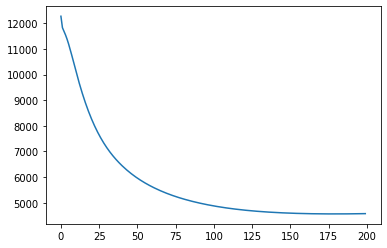

In [13]:
losses = []
for epo in range(200):
    loss_val = 0
    for data, target in idx_pairs:
        X = Variable(get_input_layer(data)).float()
    # forward
        y_pred = model(X)
        y_true = Variable(torch.from_numpy(np.array([target])).long())
    # loss
        loss = loss_fn(y_pred.view(1,-1), y_true)
        loss_val += loss.data.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
    losses.append(loss_val)
    print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')
plt.plot(losses)